In [24]:
import random
import numpy as np
from matplotlib import pyplot as plt

alphabet = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ,.! " #A
target = "Mama mia me llamo hedinyer" #B

In [25]:
class Individual: #C
    def __init__(self, string, fitness=0):
        self.string = string
        self.fitness = fitness

from difflib import SequenceMatcher

def similar(a, b): #D
    return SequenceMatcher(None, a, b).ratio()

def spawn_population(length=26,size=100): #E
    pop = []
    for i in range(size):
        string = ''.join(random.choices(alphabet,k=length))
        individual = Individual(string)
        pop.append(individual)
    return pop


In [26]:
def recombine(p1_, p2_): #A
    p1 = p1_.string
    p2 = p2_.string
    child1 = []
    child2 = []
    cross_pt = random.randint(0,len(p1))
    child1.extend(p1[0:cross_pt])
    child1.extend(p2[cross_pt:])
    child2.extend(p2[0:cross_pt])
    child2.extend(p1[cross_pt:])
    c1 = Individual(''.join(child1))
    c2 = Individual(''.join(child2))
    return c1, c2

def mutate(x, mut_rate=0.01): #B
    new_x_ = []
    for char in x.string:
        if random.random() < mut_rate:
            new_x_.extend(random.choices(alphabet,k=1))
        else:
            new_x_.append(char)
    new_x = Individual(''.join(new_x_))
    return new_x

#A This function recombines two parent strings into two new offspring
#B This function will mutate a string by randomly flipping characters

In [27]:
def evaluate_population(pop, target): #A
    avg_fit = 0
    for i in range(len(pop)):
        fit = similar(pop[i].string, target)
        pop[i].fitness = fit
        avg_fit += fit
    avg_fit /= len(pop)
    return pop, avg_fit

def next_generation(pop, size=100, length=26, mut_rate=0.01): #B
    new_pop = []
    while len(new_pop) < size:
        parents = random.choices(pop,k=2, weights=[x.fitness for x in pop])
        offspring_ = recombine(parents[0],parents[1])
        child1 = mutate(offspring_[0], mut_rate=mut_rate)
        child2 = mutate(offspring_[1], mut_rate=mut_rate)
        offspring = [child1, child2]
        new_pop.extend(offspring)
    return new_pop

#A This function assigns a fitness score to each individual in the population
#B This function generates a new generation by recombination and mutation

In [28]:
num_generations = 500
population_size = 900
str_len = len(target)
mutation_rate = 0.001 #A

pop_fit = []
pop = spawn_population(size=population_size, length=str_len) #B
done = False
for gen in range(num_generations):
    pop, avg_fit = evaluate_population(pop, target)
    pop_fit.append(avg_fit) #C
    new_pop = next_generation(pop, \
        size=population_size, length=str_len, mut_rate=mutation_rate)
    pop = new_pop
    print(pop[0].string)
    for x in pop: 
        if x.string == target: 
            print("Target Found!")
            done = True
    if done:
        break
#A Set the mutation rate to 0.1%
#B Create the initial random population
#C Record population average fitness over training time

ZRAOAA,iPWEiuCdbDEUwEqgSye
 fgovz,oWnMvTnXgm,TDYaTnSJ
iLzogsWl!pFM,lia.N irnxCIf
otBZFpbdqvmGypCDtkfYl.RfnJ
UHlsladTtwnyOULXzmnqLdEhSv
 fCAaNaGJeyazlVfNPLtAw cND
TWmUkCYVaozd!llDfEtuitYGen
amHaeidsaYiqYAv xZCqhPY!o 
amHaexBaUjXdQIPUid,sKeZKIn
BmUtIwdTbev agRUid,sKeZKIS
,TveiadTtewDEfYaesDxdieasr
amUtIzeQRo,MUUgJehnXyYepoD
amp,XmBaUEDmiIQ DshSXenCIf
amVzqJMk HtmTbesi,OTUnXLrs
 maqXmSXSqeohJ .Dy,NQ.evlX
amUmhfClSeDmiIQ DshSXenSye
MXQAampWKoaSYaxocyxxdieasF
mimJRio,amldGmxoDshSXenSyy
MAza VFaUEl Zc .DyuvoeZKyr
 maqXmSXSqeo,dv.NshirtbEye
mmHmhduOUQHwahQ DInedievlf
 Qio MBlSu BQDv.Dshedieasr
amHaPeM P EmiIQ tyxe!qrSyw
amiomeofUu  GmxoayxediZKIr
aLaMPsmk Ht YaxocyxxdinEOr
miQaJxBaVTUigee DshSXenSye
MQ Mmeof FoFOhQ DItudieaye
MMGmAeF S!daTZe KmExdieasr
amaMmeo OexoiZe DshSdeZasr
MMaoIsbCY!VieuhBZORxdieass
amVzqMo,ellaGme ahfedeZasr
amVzqMo,ellaGme ahfediraye
!Maa RaHVTEmiIQ ehntdiyeJr
amaM VmQC PaZIxocyhKCeHqyD
amaM MBxellaGIQ QshLdieSye
amitmeC Ou W mCDfzaiVieayr
MMaaAiYHP Eaeme ashediraye
M

In [29]:
pop.sort(key=lambda x: x.fitness, reverse=True) #sort in place, highest fitness first
pop[0].string

'Mmaa ia  llaGmx ahYedinqyr'

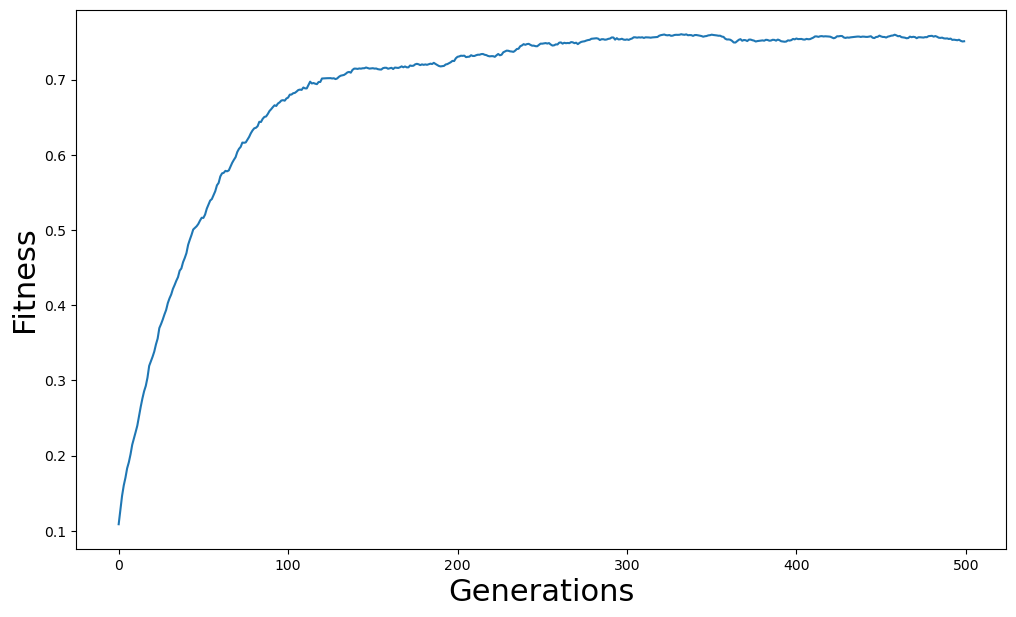

In [30]:
plt.figure(figsize=(12,7))
plt.xlabel("Generations",fontsize=22)
plt.ylabel("Fitness",fontsize=22)
plt.plot(pop_fit)